# **CUSTOMER SEGMENTATION TOOL**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
# The goal of this customer segmentation project using k-means clustering algorithm is tosegment customers into distinct groups based on their similarities in purchasing behavior

In [3]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import skew,kurtosis
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
import plotly.graph_objs as go
import plotly.io as pio
import pickle
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load the dataset and convert it into dataframe
df=pd.read_csv("/content/drive/MyDrive/projects/Customer Segmentation Project/customer.csv",sep='\t')
df.head()
# ID: Customer ID or unique identifier for each customer
# Year_Birth: Year of birth of the customer
# Education: Level of education attained by the customer (e.g., Graduation, PhD, Master, 2n Cycle, Basic)
# Marital_Status: Marital status of the customer (e.g., Single, Married, Divorced, Together, Widow, Alone, Absurd, YOLO)
# Income: Income level of the customer
# Kidhome: Number of children in the household under 18 years old
# Teenhome: Number of teenagers in the household (aged 18-19 years old)
# Dt_Customer: Date when the customer was first contacted or registered
# Recency: Recency of the customer's last purchase or interaction in days
# MntWines: Amount spent on wines
# MntFruits: Amount spent on fruits
# MntMeatProducts: Amount spent on meat products
# MntFishProducts: Amount spent on fish products
# MntSweetProducts: Amount spent on sweet products
# MntGoldProds: Amount spent on gold products
# NumDealsPurchases: Number of purchases made with discounts or deals
# NumWebPurchases: Number of purchases made through the web
# NumCatalogPurchases: Number of purchases made through catalogs
# NumStorePurchases: Number of purchases made in physical stores
# NumWebVisitsMonth: Number of visits to the website per month
# AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2: Binary indicators (0 or 1) representing whether the customer accepted a particular marketing campaign (Cmp3, Cmp4, Cmp5, Cmp1, Cmp2)
# Complain: Binary indicator (0 or 1) representing whether the customer made a complaint
# Z_CostContact: Cost associated with contacting the customer
# Z_Revenue: Revenue generated from contacting the customer
# Response: Binary indicator (0 or 1) representing whether the customer responded positively to a marketing campaign or offer

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
# shape of the dataframe
df.shape

(2240, 29)

In [6]:
# no duplicate values in the data
df['ID'].nunique()

2240

In [7]:
# Drop the columns which are not useful in our model building
columns_to_remove = ['ID','Dt_Customer','Complain','Z_CostContact','Z_Revenue','Response']
for column in columns_to_remove:
  df.drop(column,axis=1,inplace=True)

In [8]:
# checking the shape of the dataframe after removing columns
df.shape

(2240, 23)

In [9]:
# Columns in the dataframe
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2'],
      dtype='object')

In [10]:
# Information about the columns in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Recency              2240 non-null   int64  
 7   MntWines             2240 non-null   int64  
 8   MntFruits            2240 non-null   int64  
 9   MntMeatProducts      2240 non-null   int64  
 10  MntFishProducts      2240 non-null   int64  
 11  MntSweetProducts     2240 non-null   int64  
 12  MntGoldProds         2240 non-null   int64  
 13  NumDealsPurchases    2240 non-null   int64  
 14  NumWebPurchases      2240 non-null   int64  
 15  NumCatalogPurchases  2240 non-null   i

In [11]:
# Generate Descriptive Statistics of a dataframe
df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393
std,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
# checking correlation of the data
df.corr()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2
Year_Birth,1.000000,-0.161791,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,-0.018133,...,-0.060846,-0.145040,-0.121275,-0.128272,0.121139,0.061774,-0.060510,0.007123,-0.005930,-0.006539
Income,-0.161791,1.000000,-0.428669,0.019133,-0.003970,0.578650,0.430842,0.584633,0.438871,0.440744,...,-0.083101,0.387878,0.589162,0.529362,-0.553088,-0.016174,0.184400,0.335943,0.276820,0.087545
Kidhome,0.230176,-0.428669,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,-0.370673,...,0.221798,-0.361647,-0.502237,-0.499683,0.447846,0.014674,-0.161600,-0.205634,-0.172339,-0.081716
Teenhome,-0.352111,0.019133,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,-0.162475,...,0.387741,0.155500,-0.110769,0.050695,0.134884,-0.042677,0.038886,-0.191050,-0.140090,-0.015605
Recency,-0.019871,-0.003970,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,0.022670,...,-0.001098,-0.010726,0.025110,0.000799,-0.021445,-0.032991,0.018826,0.000129,-0.019283,-0.001781
MntWines,-0.157773,0.578650,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,0.386581,...,0.010940,0.542265,0.635226,0.642100,-0.320653,0.062202,0.373286,0.472613,0.354133,0.205907
MntFruits,-0.017917,0.430842,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,0.567164,...,-0.132114,0.296735,0.487917,0.461758,-0.418383,0.014727,0.010152,0.215833,0.194748,-0.009773
MntMeatProducts,-0.030872,0.584633,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,0.523846,...,-0.122415,0.293761,0.723827,0.479659,-0.539470,0.018272,0.102912,0.373769,0.309761,0.043033
MntFishProducts,-0.041625,0.438871,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,0.579870,...,-0.139361,0.293681,0.534478,0.459855,-0.446003,0.000357,0.016843,0.199578,0.260762,0.002577
MntSweetProducts,-0.018133,0.440744,-0.370673,-0.162475,0.022670,0.386581,0.567164,0.523846,0.579870,1.000000,...,-0.120100,0.348544,0.490924,0.448756,-0.423294,0.001530,0.028641,0.259590,0.241818,0.009985


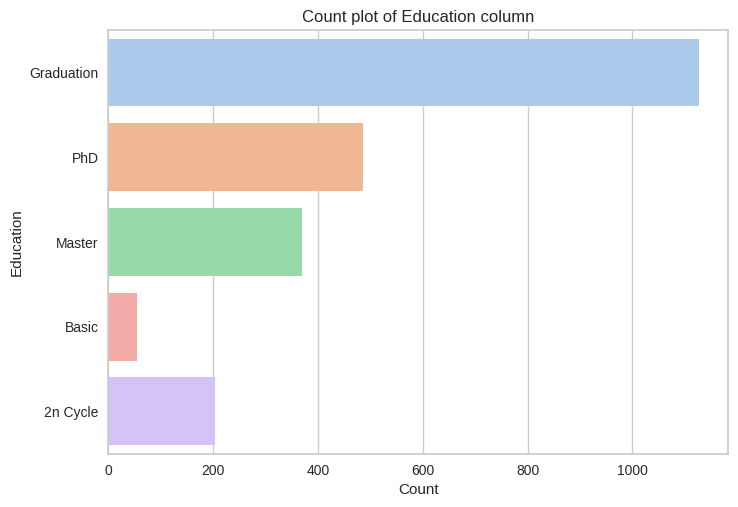

In [13]:
# creating countplot of Eduaction column
sns.countplot(df['Education'],palette='pastel')
plt.title('Count plot of Education column')
plt.xlabel('Count')
plt.ylabel('Education')
plt.show()
# Graduation has highest frequency among all the categories.

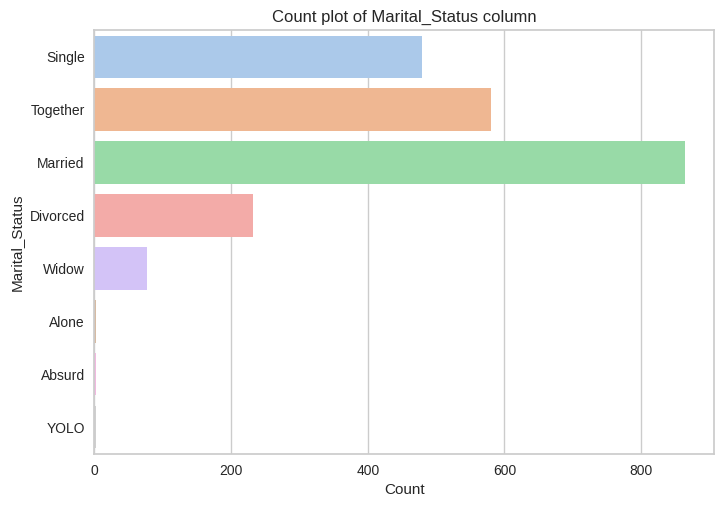

In [14]:
# creating countplot of Eduaction column
sns.countplot(df['Marital_Status'],palette='pastel')
plt.title('Count plot of Marital_Status column')
plt.xlabel('Count')
plt.ylabel('Marital_Status')
plt.show()
# Married has highest frequency among all the categories.

In [15]:
# Extracting the categorical coulmns from the dataframe and count of their categories also
import pandas as pd
for column in df.columns:
    if df[column].dtype == 'object':
        counts = df[column].value_counts()
        print("Column:", column)
        print(counts)
        print()
# we can clearly see that most of the customers completed their graduation
# also most of the customers are married

Column: Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

Column: Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64



In [16]:
# Encoding categorical Education column to numerical column
education_categories = ['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD']
encoder = OrdinalEncoder(categories=[education_categories])
df['Education'] = encoder.fit_transform(df[['Education']])
df['Education'] = df['Education'].astype(int)
# We use ordinal encoding because order matters in education

In [17]:
# Encoding categorical Marital_Status column to numerical column
encoder = LabelEncoder()
df['Marital_Status'] = encoder.fit_transform(df['Marital_Status'])
# We use label encoding because order does not matters in Marital_Status

In [18]:
# Checking which values is assingn to which category in Marital_Status column
encoded_categories = encoder.classes_
encoded_values = encoder.transform(encoded_categories)
print("Encoded Categories:", encoded_categories)
print("Encoded Values:", encoded_values)

Encoded Categories: ['Absurd' 'Alone' 'Divorced' 'Married' 'Single' 'Together' 'Widow' 'YOLO']
Encoded Values: [0 1 2 3 4 5 6 7]


<Axes: ylabel='Education'>

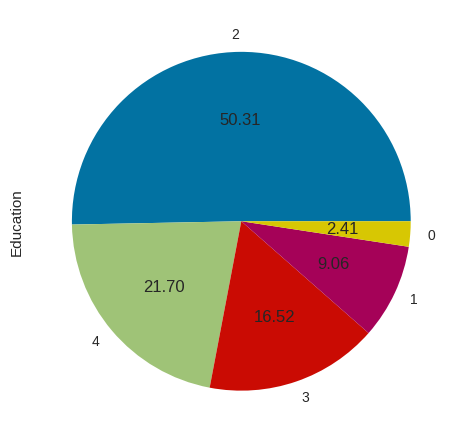

In [19]:
# Pie chart of Education Column
# {'Basic': 0, '2n Cycle': 1, 'Graduation': 2, 'Master': 3, 'PhD': 4}
df['Education'].value_counts().plot(kind='pie',autopct='%.2f')
# Percentage of Graduate persons are higher

<Axes: xlabel='Education', ylabel='Income'>

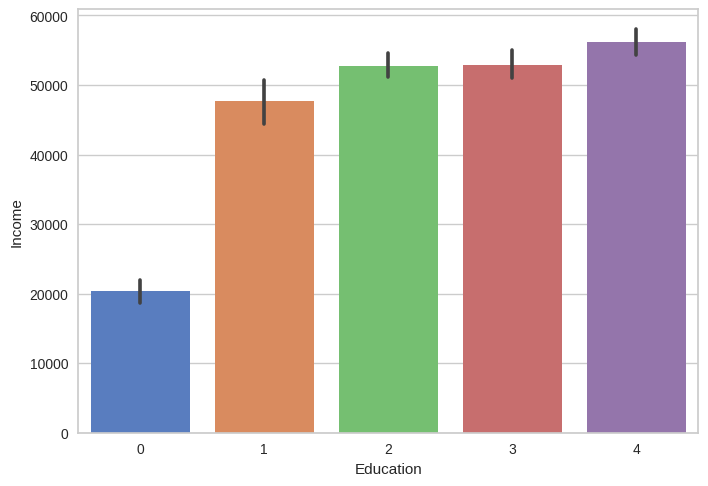

In [20]:
# creating bar plot of Income Column using Eduaction categories
sns.barplot(data=df,x='Education',y='Income',palette='muted')
# average income of peoples who dones their phd is more than other education categories and it is around 55,000

<Axes: >

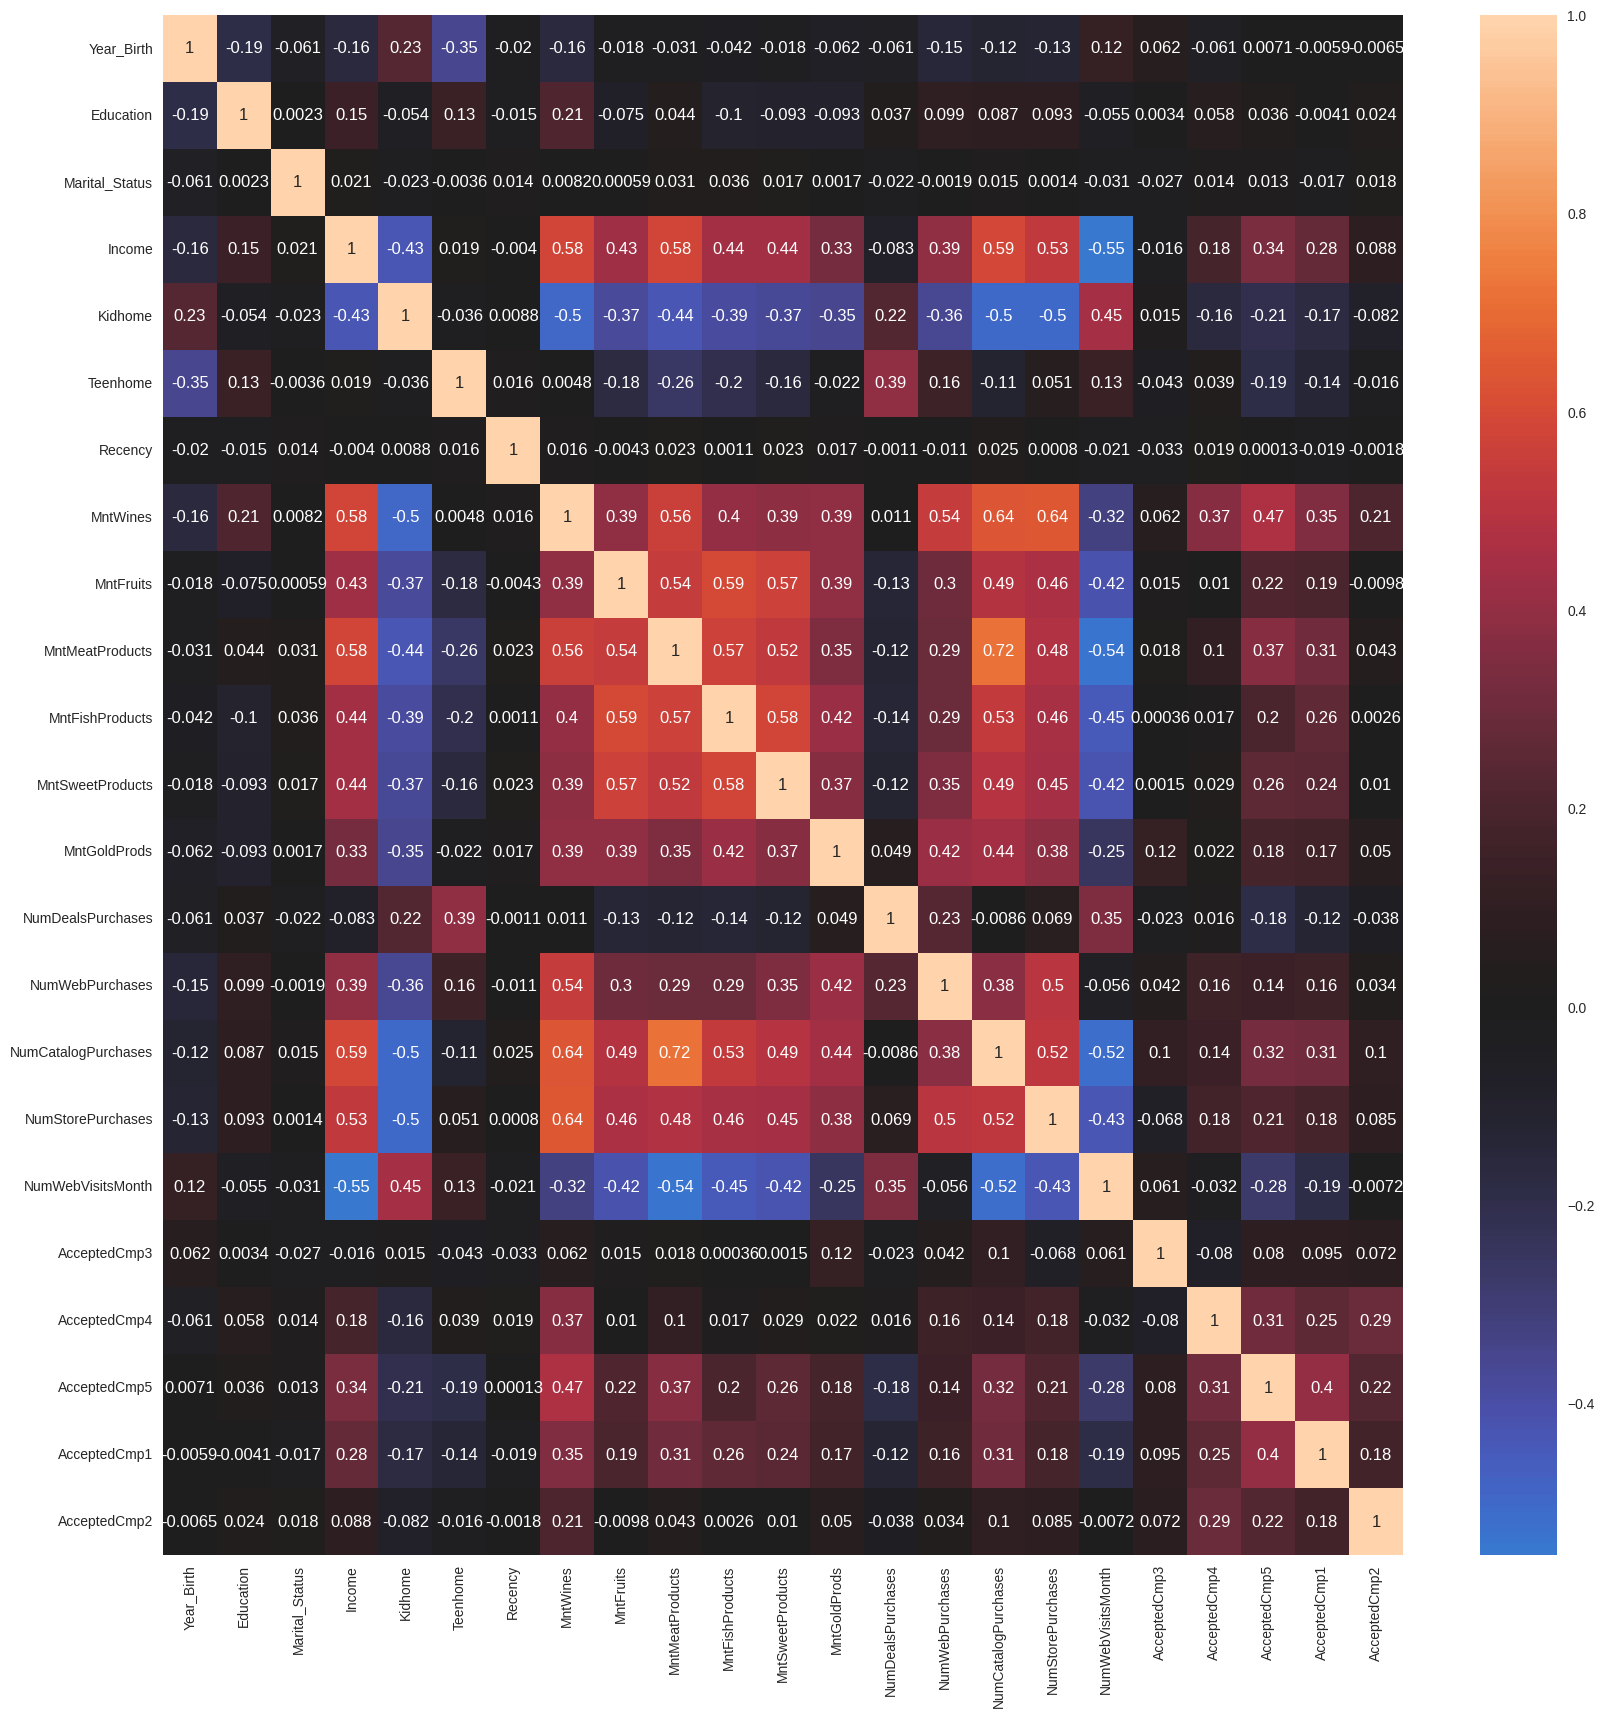

In [21]:
# Creating correlation matrix
corrmat= df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrmat,annot=True,center=0)

In [22]:
# scatter plot of the data columns
sns.pairplot(df)

Output hidden; open in https://colab.research.google.com to view.

In [23]:
# Check the count of null values in each column
df.isnull().sum()
# There are 24 Null values in Income Column

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
dtype: int64

In [24]:
# Check the data type of income column
df['Income'].dtypes

dtype('float64')

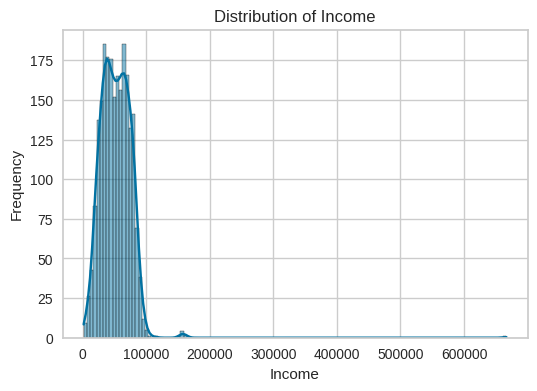

In [25]:
# plot the distribution plot of Income column
plt.figure(figsize=(6, 4))
sns.histplot(df['Income'], kde=True)
plt.title("Distribution of Income")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()
# The mean or median is likely to be greater than the mode(positively skewed).
# The left tail of the distribution is shorter than the right tail.
# The distribution is not symmetrical.

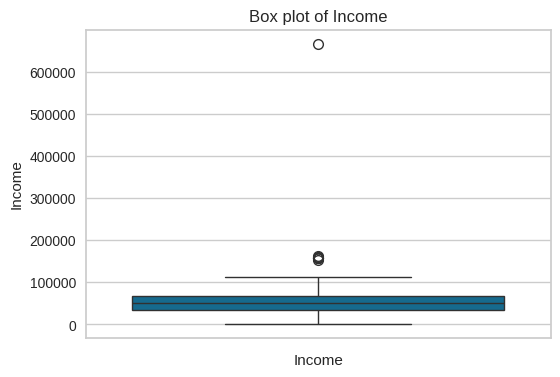

In [26]:
# Plot the Box plot of the Income column
plt.figure(figsize=(6, 4))
sns.boxplot(df['Income'])
plt.title("Box plot of Income")
plt.xlabel("Income")
plt.show()
# The distribution of income is positively skewed, meaning there are more people with lower incomes than higher incomes

In [27]:
# Summary statistics of Income column
df['Income'].describe()
# The mean income is around $52,247
# The 25th percentile (Q1) is around $35,303, meaning 25% of people earn less than $35,303
# The 75th percentile (Q3) is around $68,522, meaning 75% of people earn less than $68,522
# There are some outliers, which are incomes that are much higher or lower than the rest of the data

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [28]:
mean_income=df['Income'].mean()            # mean of the income column
median_income=df['Income'].median()        # median or 2nd quartile of the income column
mode_income=df['Income'].mode().iloc[0]    # mode of the income column
std_income=df['Income'].std()              # standard deviation of the income column
q1_income=df['Income'].quantile(0.25)      # 1st quartile of the income column
q3_income=df['Income'].quantile(0.75)      # 3rd quartile of the income column
p10_income=df['Income'].quantile(0.1)      # 10th percentile of the income column
p90_income=df['Income'].quantile(0.9)      # 90th percentile of the income column
IQR_income=q3_income-q1_income             # Inter-Quartile range of the income column
Semi_IQR_income=IQR_income/2               # Semi-Inter-Quartile range of the income column

In [29]:
print(mean_income)
print(median_income)
print(mode_income)
# We saw that mean>median>mode i.e. positively skewed distibution

52247.25135379061
51381.5
7500.0


In [30]:
# Check the Skewness and Kurtosis of the Income column
income_skew=df['Income'].skew()
income_kurt=df['Income'].kurtosis()
print(income_skew)
print(income_kurt)
# we clearly sees that the income column is highely positively skewed and also it has higher peak (i.e.leptokurtic)

6.763487372811116
159.6366995778005


In [31]:
# Check the Skewness and kurtosis
PFC_income_skew=(mean_income-mode_income)/std_income                     # Pearson's 1st coefficient of skewness
PSC_income_skew=(3*(mean_income-median_income))/std_income               # Pearson's 2nd coefficient of skewness
Bowleys_income_skew=(q3_income+q1_income-(2*median_income))/IQR_income   # Bowley's skewness
PCK_income_skew=Semi_IQR_income/(p90_income-p10_income)                  # Percentile Coefficient of Kurtosis
print(PFC_income_skew)
print(PSC_income_skew)
print(Bowleys_income_skew)
print(PCK_income_skew)
# hence, we conclude that the distribution is positively skewed and leptokurtic

1.7775837239351693
0.10317586905878173
0.03196965591980493
0.2980538881860515


In [32]:
# check the percentage of null values in Income column
null_count = df['Income'].isnull().sum()

# Total number of rows in the column
total_count = len(df['Income'])

# Calculate the percentage of null values
percentage_null = (null_count / total_count) * 100

print(f"Percentage of null values in the Income column: {percentage_null:.2f}%")
# percentage of null values in Income column is 1.07%

Percentage of null values in the Income column: 1.07%


In [33]:
# Fill the missing value with Median
"""so we conclude that we fill the missing values with median because the data is skewed and outliers are present in
the data. Also the percentage of missing values in Income column is less than 5%"""

# Calculate the median of the column
median_value = df["Income"].median()

# Impute missing values with the median
df["Income"] = df["Income"].fillna(median_value)

In [34]:
# Recheck the count of null values in each column
df.isnull().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
dtype: int64

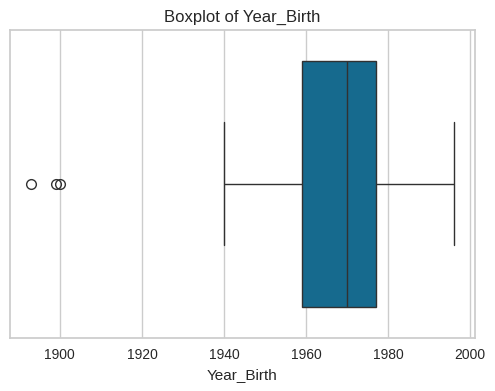

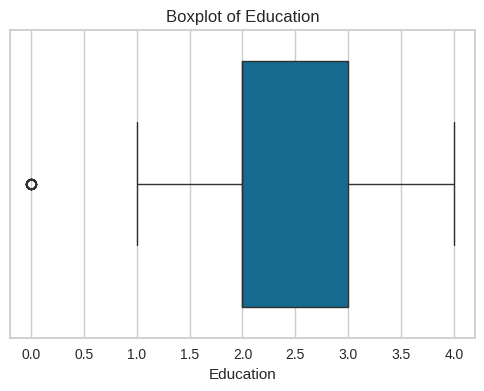

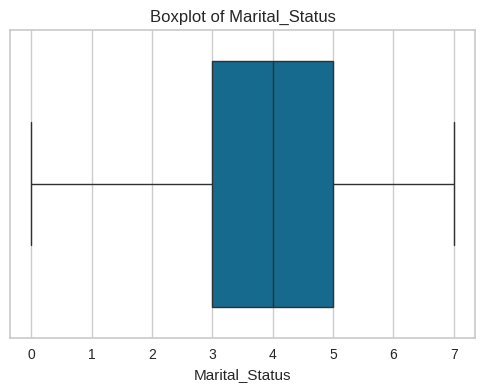

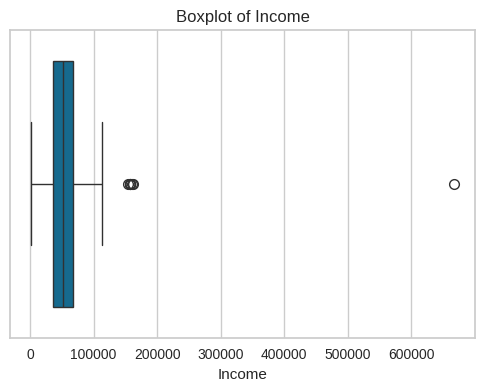

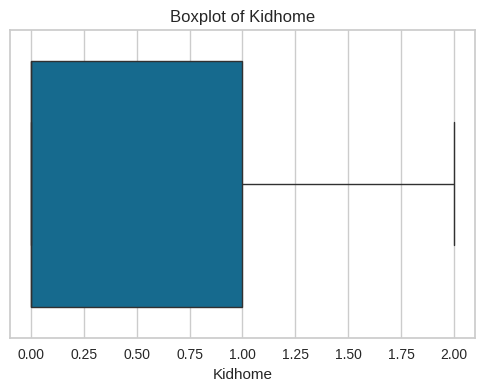

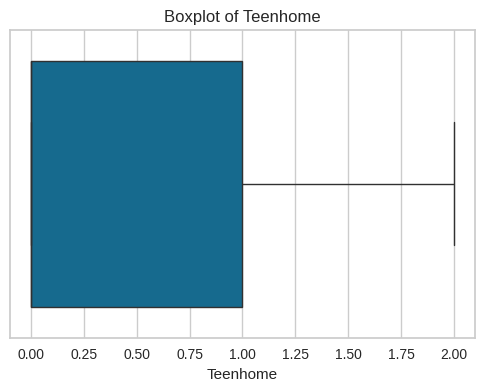

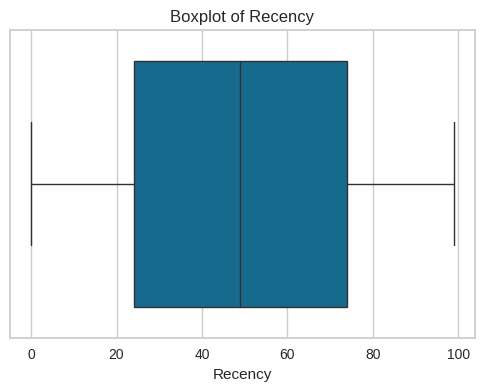

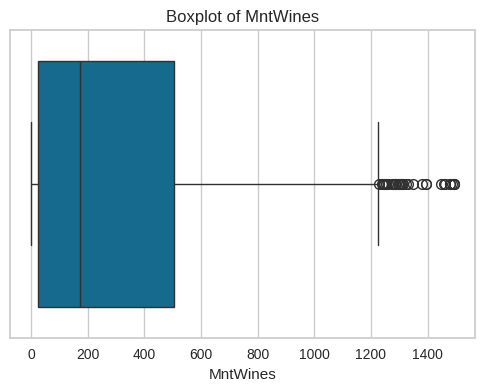

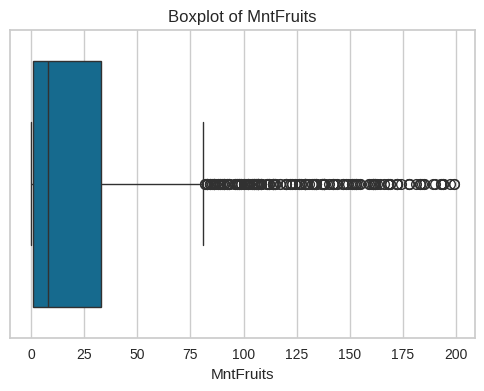

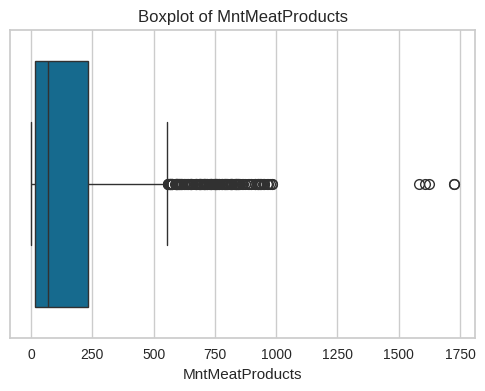

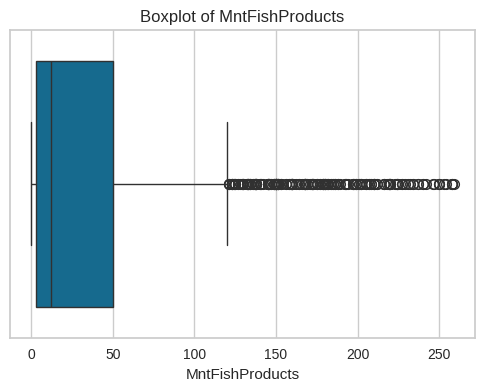

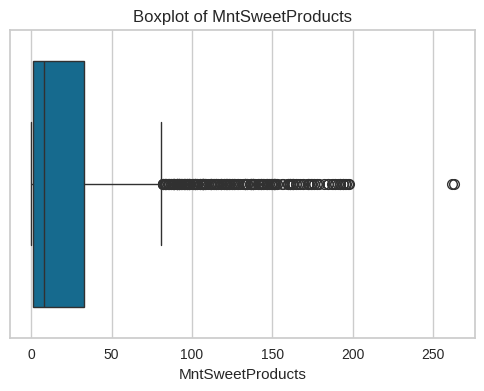

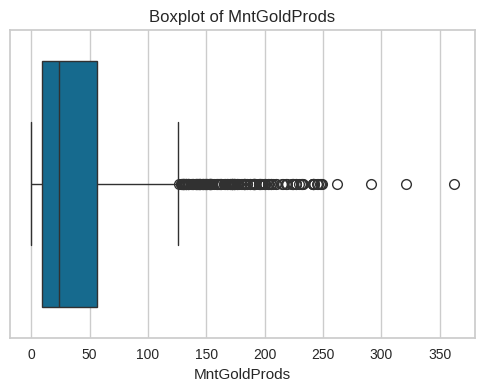

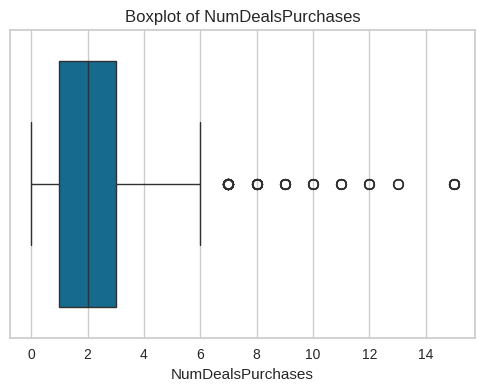

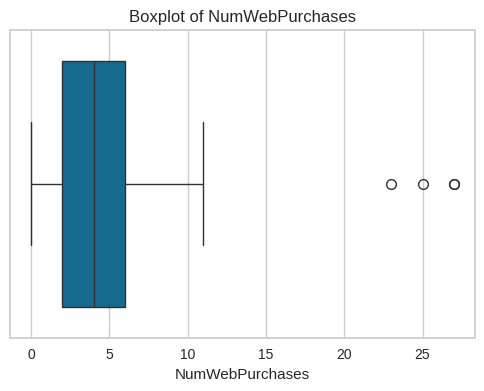

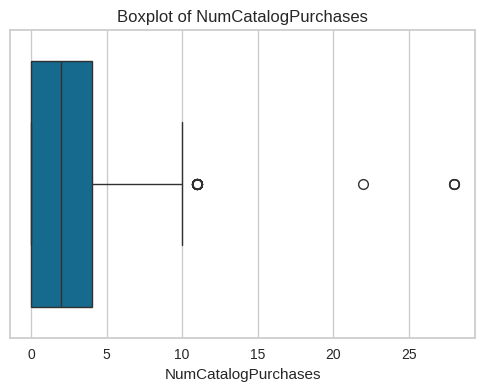

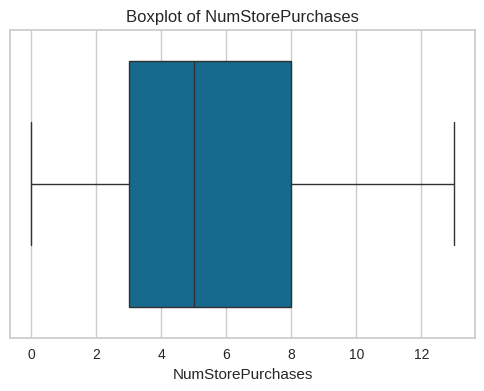

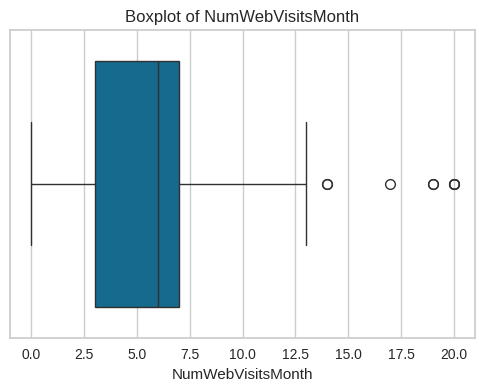

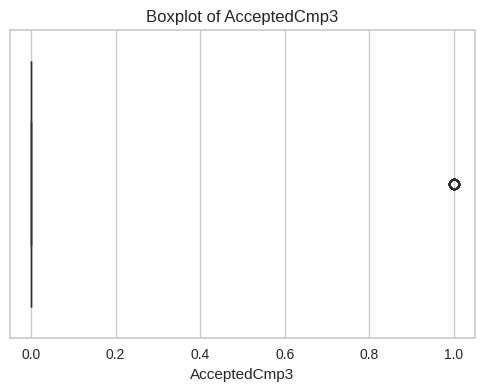

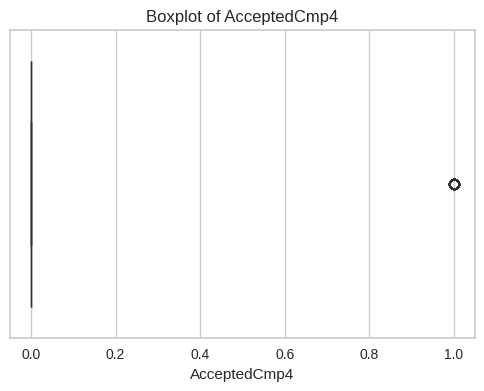

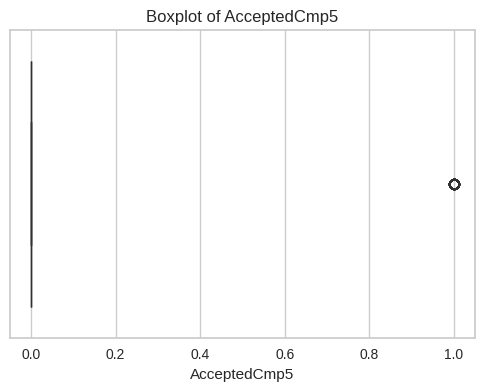

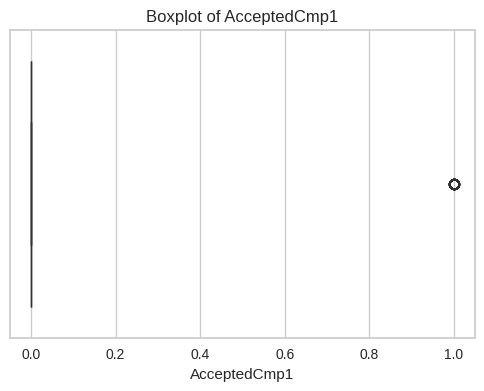

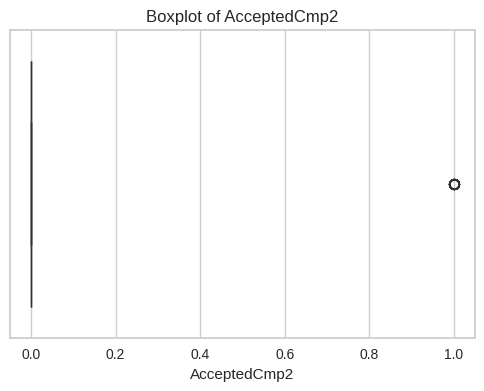

In [35]:
# Check outliers using boxplot
for column in df.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()
# we can clearly sees that Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth having outliers.

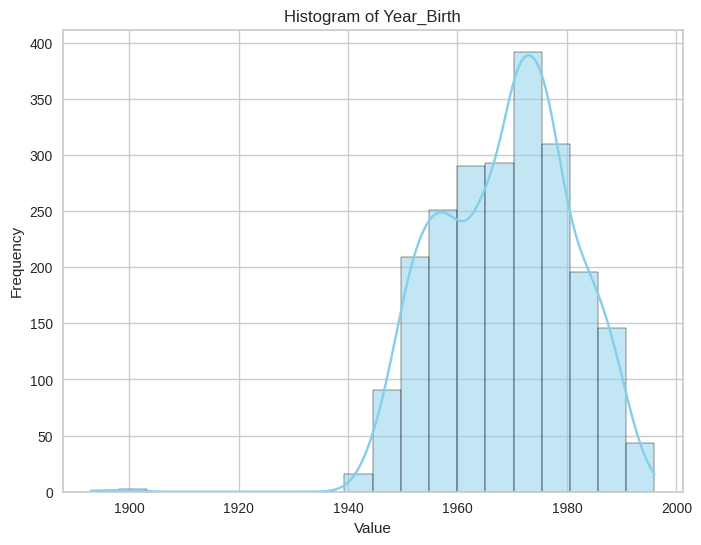

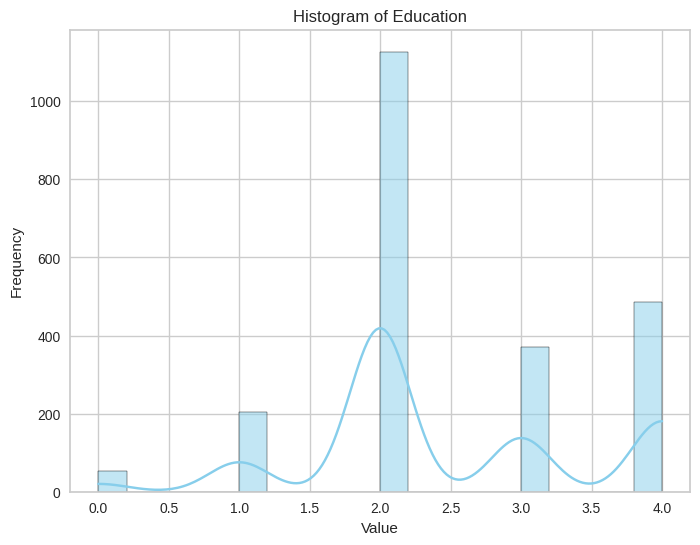

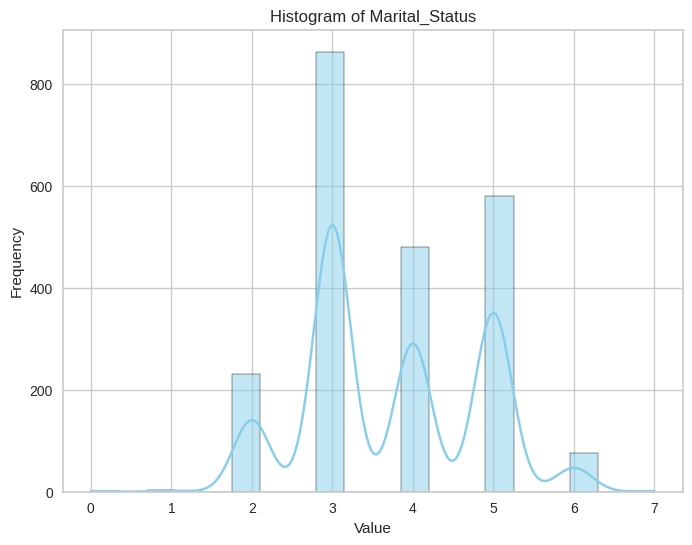

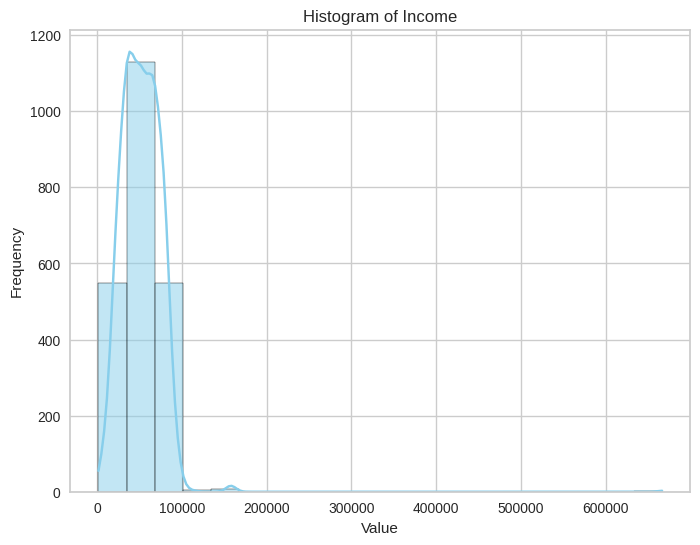

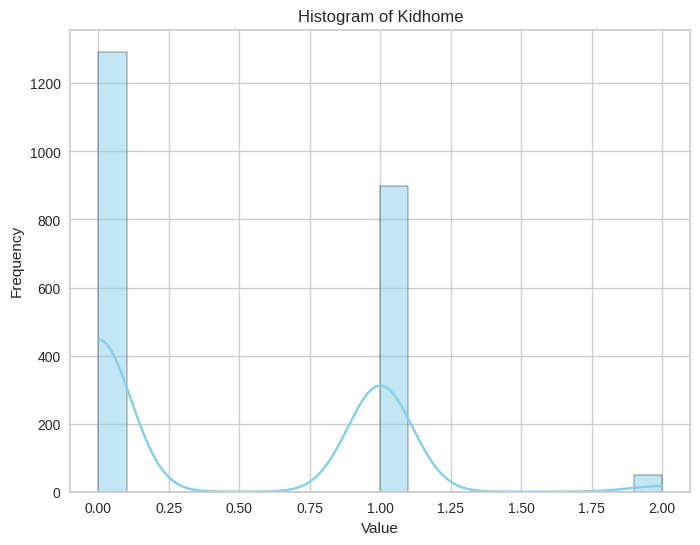

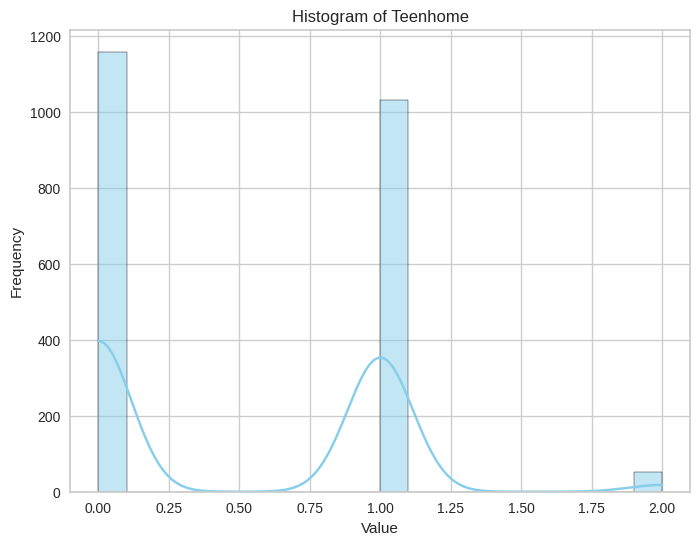

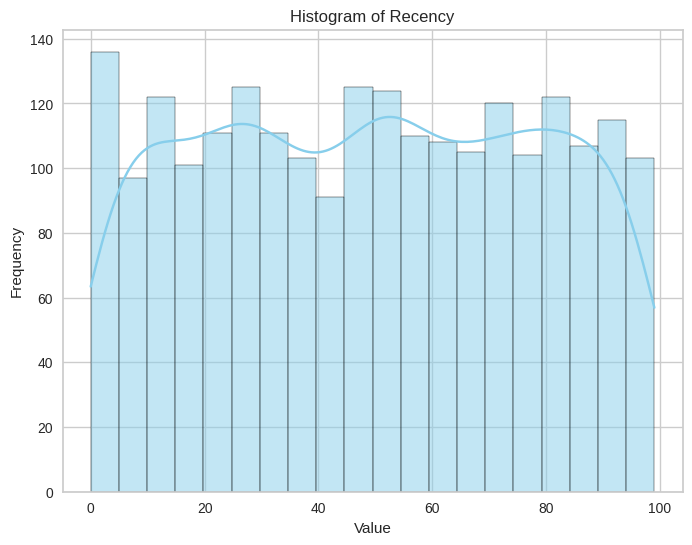

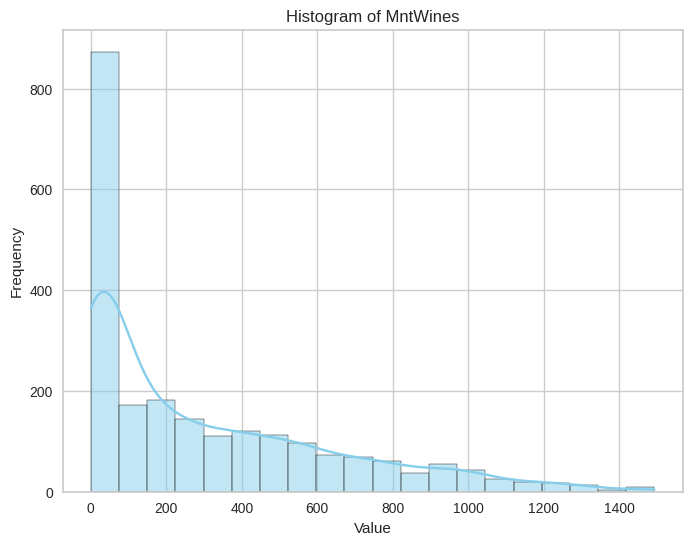

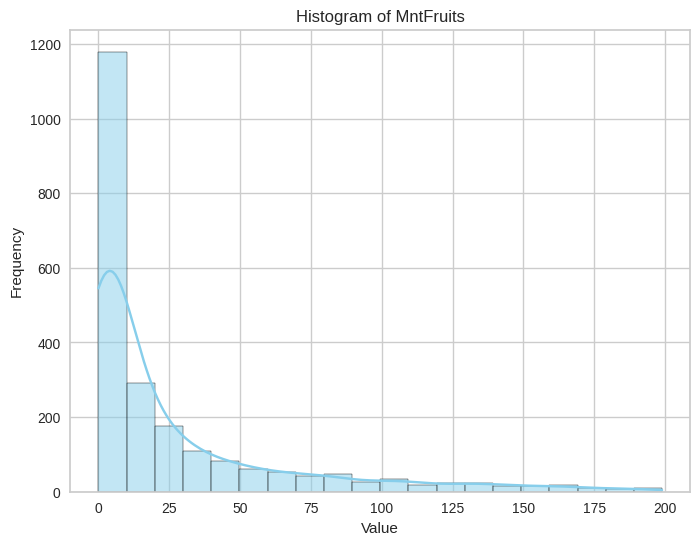

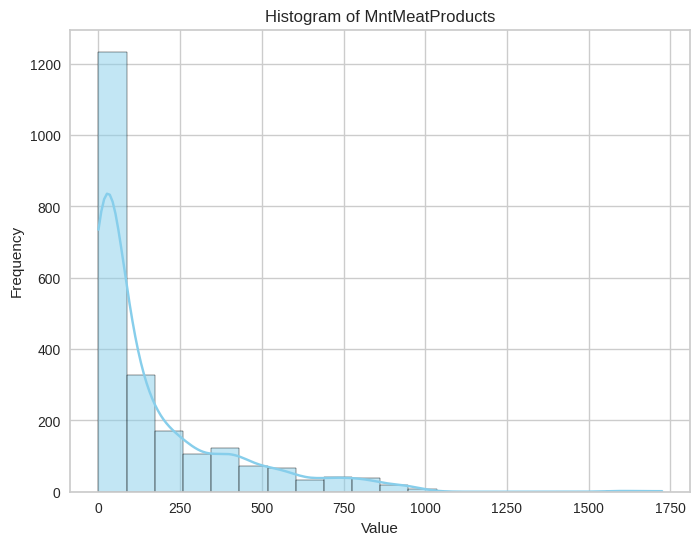

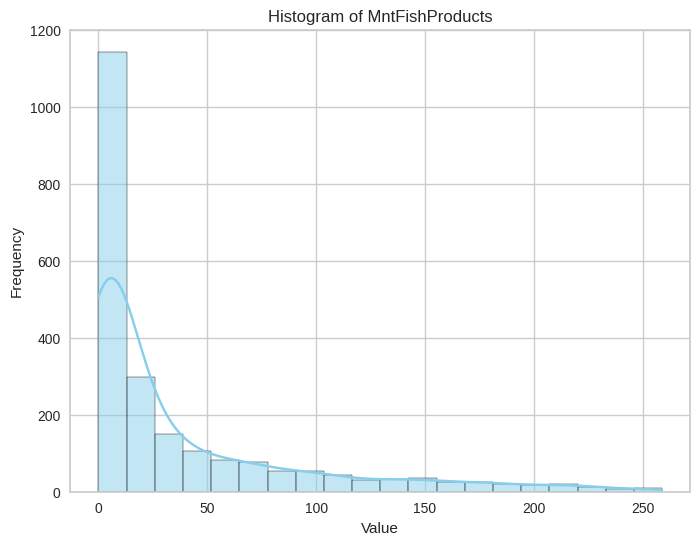

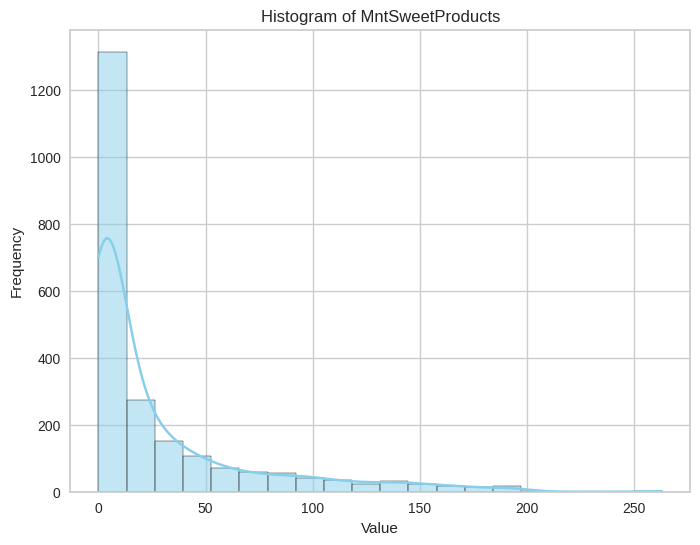

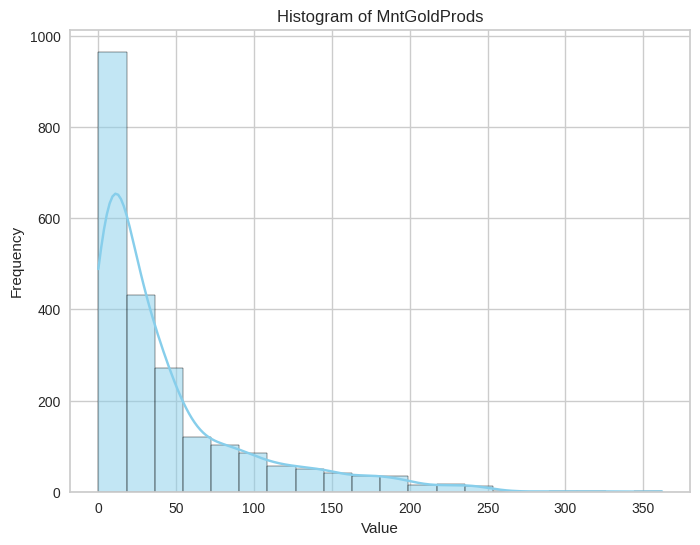

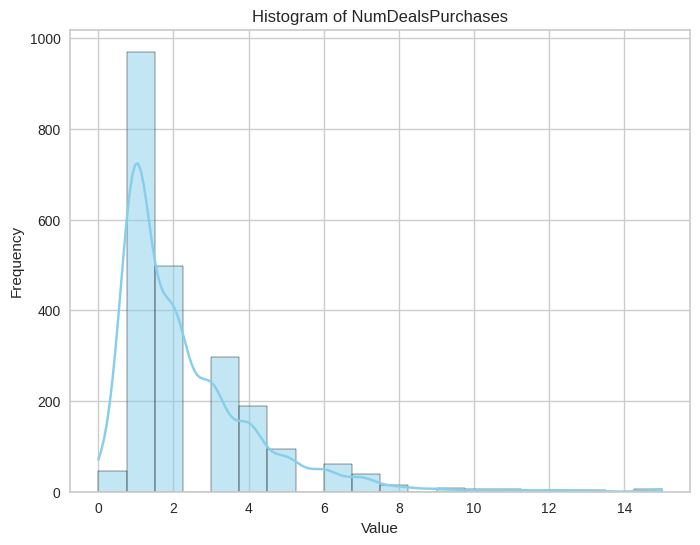

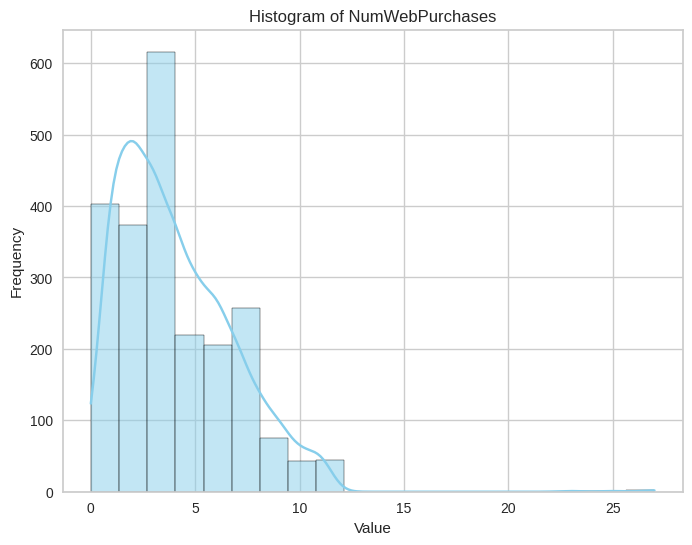

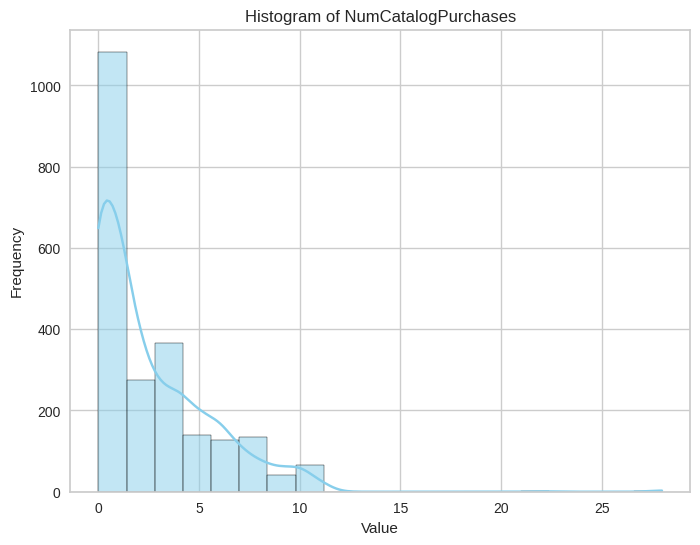

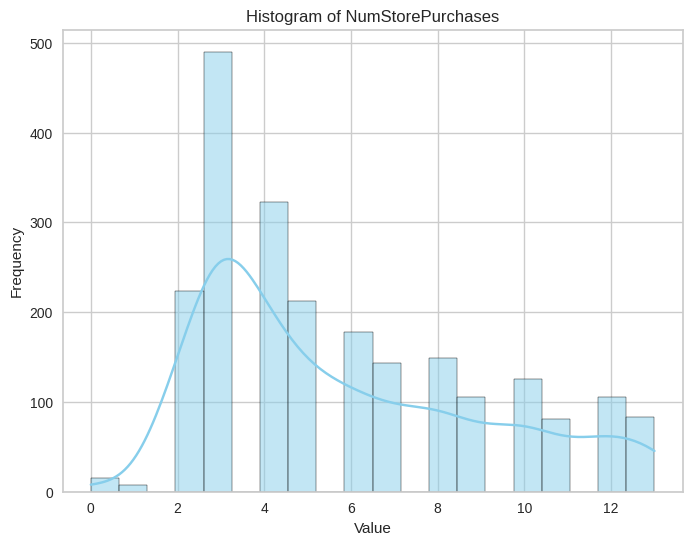

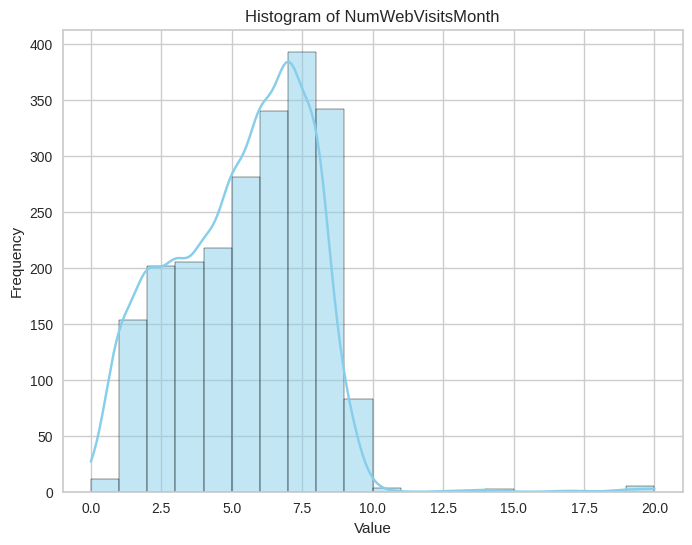

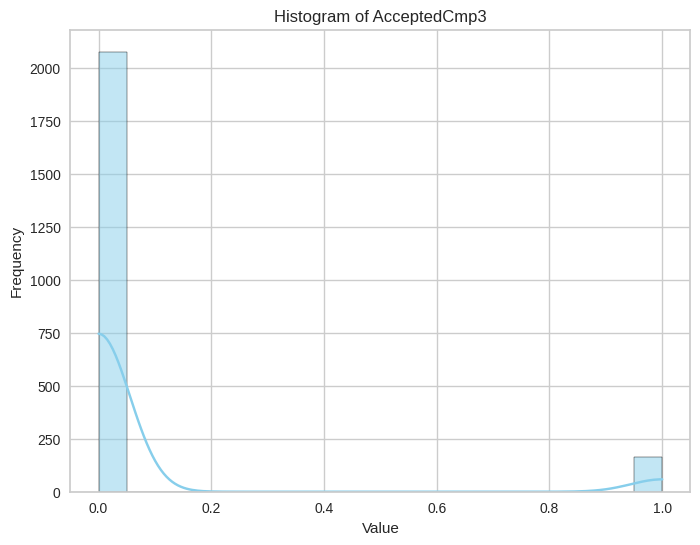

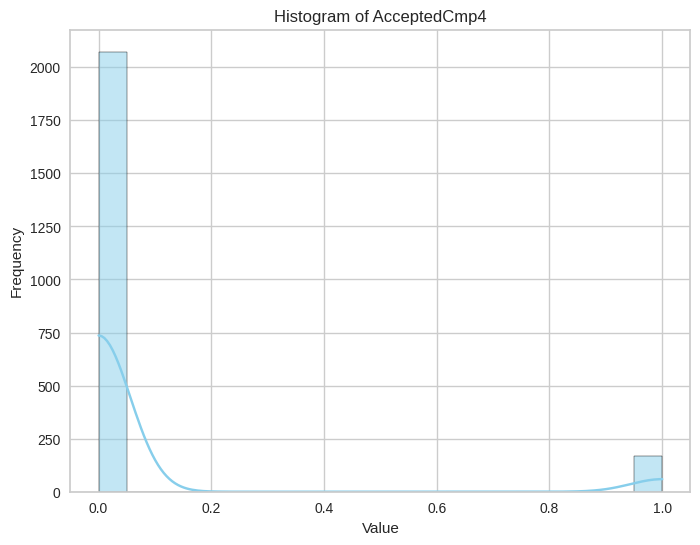

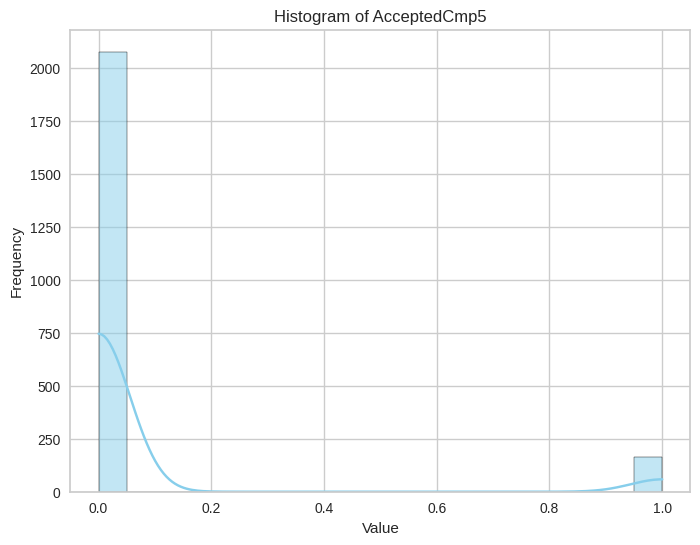

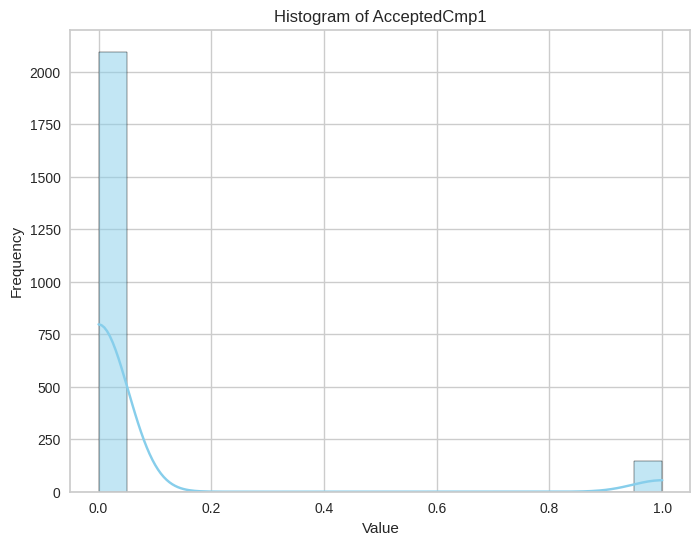

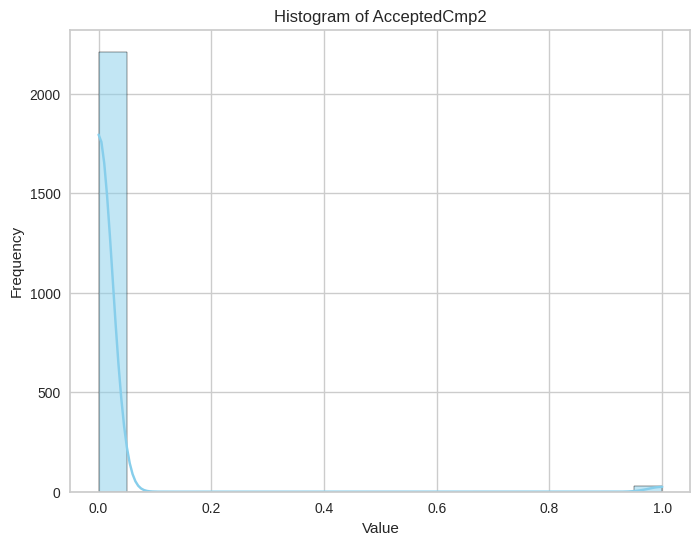

In [36]:
# Check outliers using histogram
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], bins=20, kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()
# we can clearly sees that Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth are skewed. this means that their is a chance of existence of outliers in these columns

In [37]:
# Function to calculate the percentage of outliers in each column
def calculate_outlier_percentage(data):
    outlier_percentages = {}
    for column in data.columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_count = ((data[column] < lower_bound) | (data[column] > upper_bound)).sum()
        percentage_outliers = outliers_count / len(data[column]) * 100
        outlier_percentages[column] = percentage_outliers
    return outlier_percentages

outlier_percentages = calculate_outlier_percentage(df)
for column, percentage in outlier_percentages.items():
    print(f"Percentage of outliers in column '{column}': {percentage:.2f}%")
# here columns Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds have higher percentage of outliers. In conclusion we should do handle them
# also columns AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5 and Response are high percentage of outliers but they are binary(0,1) column. hence we cant handle them

Percentage of outliers in column 'Year_Birth': 0.13%
Percentage of outliers in column 'Education': 2.41%
Percentage of outliers in column 'Marital_Status': 0.00%
Percentage of outliers in column 'Income': 0.36%
Percentage of outliers in column 'Kidhome': 0.00%
Percentage of outliers in column 'Teenhome': 0.00%
Percentage of outliers in column 'Recency': 0.00%
Percentage of outliers in column 'MntWines': 1.56%
Percentage of outliers in column 'MntFruits': 10.13%
Percentage of outliers in column 'MntMeatProducts': 7.81%
Percentage of outliers in column 'MntFishProducts': 9.96%
Percentage of outliers in column 'MntSweetProducts': 11.07%
Percentage of outliers in column 'MntGoldProds': 9.24%
Percentage of outliers in column 'NumDealsPurchases': 3.84%
Percentage of outliers in column 'NumWebPurchases': 0.18%
Percentage of outliers in column 'NumCatalogPurchases': 1.03%
Percentage of outliers in column 'NumStorePurchases': 0.00%
Percentage of outliers in column 'NumWebVisitsMonth': 0.36%
Per

In [38]:
# we will have to use IQR method to handle outliers because the data columns are skewed
# Function to handle outliers using IQR method and modify original data
def handle_outliers_iqr_inplace(data,columns):
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)

columns=['Income','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
handle_outliers_iqr_inplace(df,columns)
# Handeled all the columns which are containing outliers

In [39]:
# Split data into training and testing part
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)
# we will use 80% of the data for train the model

In [40]:
# Applying Standardization on training and testing data
scaler=StandardScaler()
X_train_Scaled=scaler.fit_transform(X_train)
X_test_Scaled=scaler.transform(X_test)
# scaled_df = pd.DataFrame(scaler.transform(df),columns=df.columns )   # Coverting scaled training data into dataframe
# we use standardization because scale of the features is significant

In [41]:
# we create a copy of new dataset and set number of PCA=3 for visualizing clusters.
new_df=df.copy()
pca_for_viz = PCA(n_components=3)
pca_for_viz.fit_transform(new_df)
new_df = pd.DataFrame(pca_for_viz.transform(new_df), columns=(["col1","col2", "col3"]))

In [42]:
# print the dataframe
new_df.head()

,col1,col2,col3
0,6278.047695,-322.874691,320.861001
1,-5525.679149,246.059059,-74.827483
2,19746.812008,120.888416,-119.757306
3,-25221.922076,3.611145,28.417231
4,6424.941838,211.110026,-35.101877


In [43]:
# Descriptive analysis after applying dimensionality reduction.
new_df.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2240.0,2.832426e-12,20937.869787,-50136.057752,-16329.747742,-487.156021,16431.098582,65544.557237
col2,2240.0,4.445967e-14,235.951942,-886.583204,-107.568321,32.475956,140.525058,1122.593070
col3,2240.0,-1.603796e-14,117.957787,-395.002808,-72.779565,-10.060702,60.366922,654.679936


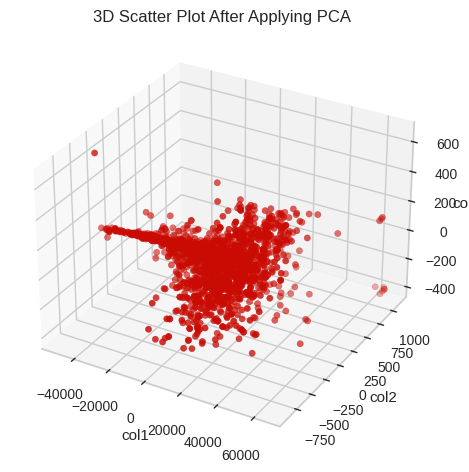

In [44]:
# visualize the data after applying PCA.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(new_df['col1'], new_df['col2'], new_df['col3'], c='r', marker='o')
ax.set_xlabel('col1')
ax.set_ylabel('col2')
ax.set_zlabel('col3')
ax.set_title('3D Scatter Plot After Applying PCA')
plt.show()

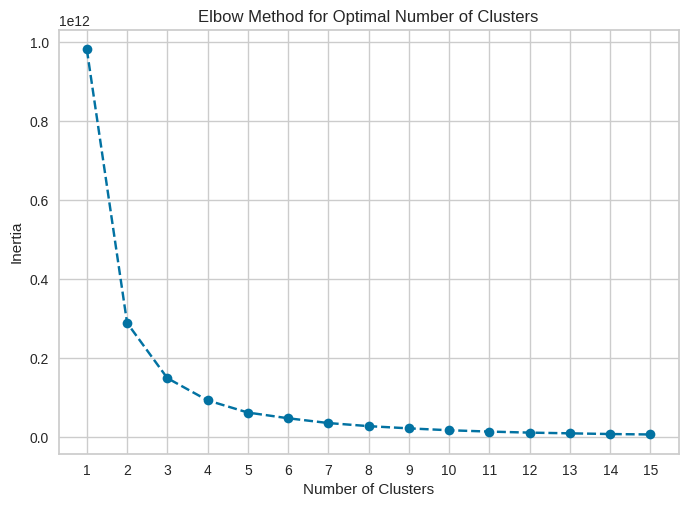

In [45]:
# Checking the number of clusters using elbow method
inertia = []
for k in range(1, 16):
    kmeans1 = KMeans(n_clusters=k, random_state=42)
    kmeans1.fit(new_df)
    inertia.append(kmeans1.inertia_)

# Plot the elbow curve
plt.plot(range(1, 16), inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 16))
plt.grid(True)
plt.show()
# we can clearly see that the optimal number of clusters are 4

Elbow Method to determine the number of clusters to be formed:


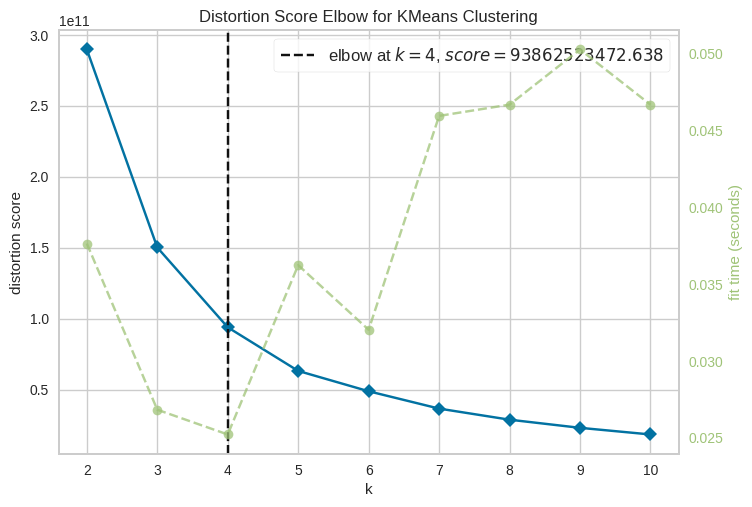

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [46]:
# Quick examination of elbow method to find numbers of clusters to make
print('Elbow Method to determine the number of clusters to be formed:')
elbow_meth = KElbowVisualizer(KMeans(), k=10)
elbow_meth.fit(new_df)
elbow_meth.show()
# optimal number of clusters are 4

In [47]:
# prediction stage of clusters.
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_ac = AC.fit_predict(new_df)
new_df["Clusters"] = yhat_ac

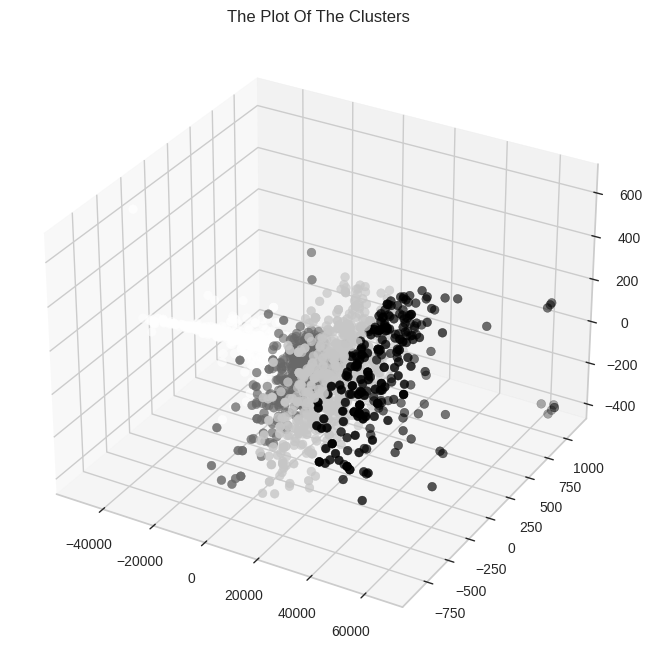

In [48]:
# 3D plot of clusters.
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(new_df['col1'],new_df['col2'],new_df['col3'],s=40, c=new_df["Clusters"], marker='o')
ax.set_title("The Plot Of The Clusters")
plt.show()

In [49]:
# 3D plot of the clusters.
trace = go.Scatter3d(
    x=new_df['col1'],
    y=new_df['col2'],
    z=new_df['col3'],
    mode='markers',
    marker=dict(
        size=5,
        color=new_df["Clusters"],
        opacity=0.8
    )
)
layout = go.Layout(
    title='The Plot Of The Clusters',
    scene=dict(
        xaxis=dict(title='col1'),
        yaxis=dict(title='col2'),
        zaxis=dict(title='col3')
    )
)
fig = go.Figure(data=[trace], layout=layout)
pio.show(fig)

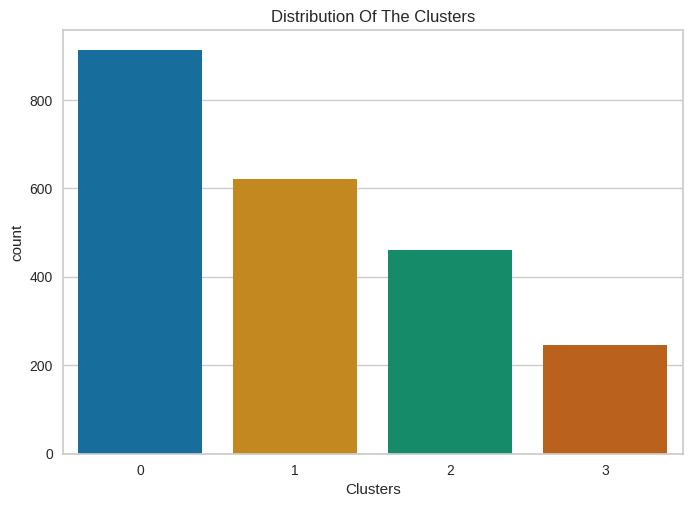

In [50]:
#Plotting countplot of clusters
pl = sns.countplot(x=new_df["Clusters"], palette='colorblind')
pl.set_title("Distribution Of The Clusters")
plt.show()
# we can clearly sees that frequency of cluster0 is more.

In [51]:
# Applying PCA on original data.
pca=PCA(n_components=0.9)
X_train_pca=pca.fit_transform(X_train_Scaled)
X_test_pca=pca.transform(X_test_Scaled)

In [52]:
# Shape of training data after applying pca
X_train_pca.shape

(1792, 16)

In [53]:
# Train the model using kmeans algorithm and assign clusters to each data point
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_train_pca)

y_pred = kmeans.predict(X_test_pca)

In [54]:
# Extracting the one data point from testing data.
X_test_pca[20]

array([-1.2222199 ,  0.56359157, -0.6043463 ,  2.19643625, -0.4220617 ,
       -0.29898913,  0.77415545, -0.91278197,  0.23188667, -0.05729075,
       -0.33945327,  0.6339106 ,  0.11072503,  0.34180037,  0.3774495 ,
       -0.70427274])

In [55]:
# Checking the predicted outputs of the model.
y_pred

array([3, 3, 1, 2, 3, 3, 0, 3, 1, 1, 0, 2, 1, 3, 3, 3, 1, 2, 1, 3, 3, 0,
       0, 1, 0, 1, 3, 0, 2, 0, 0, 3, 0, 1, 2, 1, 2, 3, 3, 3, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 3, 3, 3, 0, 3, 2, 0, 3,
       0, 1, 1, 1, 1, 1, 3, 1, 0, 2, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       3, 1, 0, 3, 1, 1, 1, 3, 2, 1, 0, 0, 3, 0, 3, 0, 1, 0, 3, 3, 1, 0,
       1, 2, 3, 1, 1, 3, 0, 2, 3, 1, 2, 1, 3, 1, 1, 1, 3, 1, 1, 3, 3, 3,
       2, 3, 3, 1, 0, 3, 0, 1, 3, 3, 0, 1, 0, 1, 0, 3, 0, 1, 3, 1, 3, 1,
       1, 0, 3, 1, 1, 3, 2, 1, 1, 3, 1, 0, 3, 3, 2, 0, 3, 3, 0, 0, 1, 3,
       2, 0, 0, 3, 0, 3, 0, 3, 0, 0, 3, 0, 3, 1, 0, 3, 1, 3, 1, 1, 3, 1,
       0, 1, 0, 3, 0, 0, 1, 0, 0, 0, 1, 1, 3, 1, 1, 0, 1, 1, 1, 1, 3, 0,
       1, 1, 0, 0, 3, 1, 3, 2, 3, 1, 3, 3, 3, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       3, 2, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 0, 0, 0, 2, 1, 1,
       2, 2, 0, 1, 0, 3, 3, 3, 1, 1, 0, 3, 1, 0, 1, 1, 0, 3, 3, 1, 3, 1,
       3, 3, 1, 1, 1, 3, 1, 0, 1, 1, 0, 3, 3, 1, 0,

In [56]:
# Checking performance of the model
silhouette_avg = silhouette_score(X_test_pca, y_pred)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.18728520302476376


In [57]:
filename = 'cs_trained_model.sav'
pickle.dump(kmeans, open(filename, 'wb'))

input_data=(-1.2222199 ,  0.56359157, -0.6043463 ,  2.19643625, -0.4220617 ,
       -0.29898913,  0.77415545, -0.91278197,  0.23188667, -0.05729075,
       -0.33945327,  0.6339106 ,  0.11072503,  0.34180037,  0.3774495 ,
       -0.70427274 )
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=kmeans.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
  print('The data is from cluster 0')
elif (prediction[0]==1):
  print('The data is from cluster 1')
elif (prediction[0]==2):
  print('The data is from cluster 2')
else:
  print('The data is from cluster 3')

[3]
The data is from cluster 3
